<head><style>
table {
	border-collapse:collapse;
}
tr {
	border:none;
}
th, td {
	border-collapse:collapse;
	border: 1px solid grey;
	padding-top:0;
	padding-bottom:0;
           padding-left: 10;
}
.verticalSplit {
	border-top:none;
	border-bottom:none;
           text-align:left;
}
.verticalSplit:first-of-type {
	border-left:none;
}
.verticalSplit:last-of-type {
	border-right:none;
}
</style></head>

# What is the True Normal Human Body Temperature?

## Background
The mean normal body temperature was held to be 37<sup>o</sup> C or 98.6<sup>o</sup> F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct? In this exercise, we will examine [a dataset from the Journal of Statistics Education](https://ww2.amstat.org/publications/jse/jse_data_archive.htm) to estimate the true normal human body temperature.

## Describing the Data

<table style="width:100%">
  <tr>
    <th  class="verticalSplit" style="border-bottom:1px solid gray">Total Population</th>
    <th  class="verticalSplit" style="border-bottom:1px solid gray">Female Population</th> 
    <th  class="verticalSplit" style="border-bottom:1px solid gray">Male Population</th>
  </tr>
  <tr>
    <td  class="verticalSplit">Sample Mean: 98.25<sup>o</sup></td>
    <td  class="verticalSplit">Sample Mean: 98.39<sup>o</sup></td> 
    <td  class="verticalSplit">Sample Mean: 98.10<sup>o</sup></td>
  </tr>
  <tr>
    <td  class="verticalSplit">Sample Standard Deviation: 0.73</td>
    <td  class="verticalSplit">Sample Standard Deviation: 0.74</td> 
    <td  class="verticalSplit">Sample Standard Deviation: 0.69</td>
  </tr>
  <tr>
    <td  class="verticalSplit" style="border-bottom:1px solid gray">Population Count: 130</td>
    <td  class="verticalSplit" style="border-bottom:1px solid gray">Population Count: 65</td> 
    <td  class="verticalSplit" style="border-bottom:1px solid gray">Population Count: 65</td>
  </tr>
</table>

Although none of the sample means are equal to assumed mean of 98.6<sup>o</sup>, the assumed mean is within one standard deviation for each population. To further examine the true population mean, we will first need to make sure that our sample abides by certain assumptions and conditions:

1. Random sample condition
    * it is assumed that every member of the true population had an equal chance at being sampled
1. Independence assumption
    * the value of one data point should not influence the value of following data points in this set
1. 10% condition
    * the sample is much less than 10% of the total population and therefore we do not need to worry about sampling without replacement
1. Sample size assumption
    * we will examine this after we have observed the approximate distribution 
1. Approximately normal distribution
    * we will look at the distribution graphically and quantitatively

### Is the sample data normally distributed?
We would assume the data to be normally distributed with a potentially right-tailed distribution to account for pyrexia (fever). Plotting the sample data probability density function (PDF) against a normal distribution shows that the data is fairly normally distributed.

![sample vs normal distribution](img/sample_v_normal.png)

To get a clearer picture, we can compare the sample empirical cumulative distribution function (ECDF) to the normal ECDF and see that the data still appears to be normally distributed with a potential variation above the median.


![Observed ECDF](img/observed_ecdf.png)

This remains true if we plot the ECDF of the female and male populations.

![Male and Female ECDF](img/ecdf_male_v_female.png)

For a quantitative analysis of normality, we will use the `stats.normaltest` method, which tests whether a sample differs from a normal distribution using D’Agostino and Pearson’s test [[link for more info](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)].  If we set our null hypothesis (H<sub>0</sub>) to be that the sample data is normally distributed and set our significance level at 0.05, we draw the following conclusions:

<div style="width:300px; margin:0 auto; padding:10;">
    <p style="text-align: left;">
        <b>All Temperature Data</b>: p = 0.259<br />
        <b>Female Temperature Data</b>: p = 0.094<br />
        <b>Male Temperature Data</b>: p = 0.640<br />
    </p>
</div>

For each of these, the null hypothesis cannot be rejected, so we can assume that the sample data is normally distributed. Back to the question of a sufficiently sized sample, we can assume that because the data is normally distributed, not skewed, and unimodal, that our sample size of 130 is large enough to apply the Central Limit Theorem.  

## Is the true population mean 98.6 degrees F?
To answer this we will first set up our hypothesis parameters to examine the difference between a bootstrap sample mean and the proposed population mean of 98.6<sup>o</sup>F in order to examine the probability that our sample mean of 98.2<sup>o</sup>F would appear given a true population mean of 98.6<sup>o</sup>F.

**H**<sub>0</sub>: The true population mean is 98.6<sup>o</sup>.
**Significance level**: 0.05

In order to create a normal distribution assuming the null hypothesis, we first set the mean of the distribution at 98.6 and we estimate the standard deviation by dividing the sample standard deviation by the square root of the sample size (giving us 0.064). We then use the `numpy random.normal` module to generate 10,000 sample means. 

If we then compare the hypothesized distribution to the distribution of 10,000 bootstrapped means from the the sample data (mean = 98.25, standard deviation =  and compare that distribution to the normal distribution of the null hypothesis, we can see that there is very little overlap between these two populations. This leads us to believe that we will reject the null hypothesis, but first let's look at some other test statistics.

![Bootstrap Sample vs Null Hypothesis](img/bs_v_null_distro.png)

| H<sub>0</sub> Statistic | Value                  |
| ----------------------- | ---------------------- |
| 95% Confidence Interval | (98.48, 98.72)         |
| z-score                 | -5.48                  |
| p-value                 | 2.18 * 10<sup>-8</sup> |
| t-statistic             | -5.45                  |
| p-value                 | 2.45 * 10<sup>-8</sup> |

Since the sample mean of 98.25 is outside of the 95% confidence interval for our null hypothesis, we can reject the null hypothesis. Even though we do not know the true population variance, we have a large enough sample size to safely calculate the z-score to find the number of standard deviations our sample mean would be from a mean of 98.6. The z-score of -5.48 and p-value of 2.18 * 10<sup>-8</sup> means that it is very unlikely that 98.25 would fall within the normal distribution if the true population mean is 98.6<sup>o</sup>F. Since we have a large sample size, we get a nearly identical t-statistic. This brings us to the conclusion that we should **reject the null hypothesis** and assume that the true population mean is not 98.6<sup>o</sup>F.

## At what temperature should we consider someone's temperature to be 'abnormal'?
With a 95% confidence interval, temperatures considered to be abnormal would fall below 98.12 and above 98.38. Even if we expand to a 99% confidence interval, the range of normal temperature remains fairly tight between 98.08 and above 98.42. In both cases, the assumed average body temperature of 98.6<sup>o</sup>F would be categorized as abnormal. Considering the differences in sample means and standard deviations that we found earlier, it may be more appropriate to determine abnormal temperature that are more specific to a person's sex.

## Is there a significant difference between males and females in normal temperature?
The sample distribution of male and female body temperatures show a significant amount of overlap between the two subgroups, but there appears to be a difference in their means. We will investigate whether this is a significant difference or whether it falls within the expected variance of the population.

![Sample Distribution of Male and Female Body Temperatures](img/m_f_distro.png)

If we bootstrap 10,000 sample means using the female and male data and plot their distributions, we see that they do overlap, but neither of their means seem to fall within the distribution of the other.

![10,000 Bootstrap Female vs Male Means](img/bs_male_v_female_distro.png)

We can examine this further by first setting the null hypothesis and significance.

**H<sub>0</sub>**: There is no difference in means between female and male body temperatures.<br />
**critical value**: 0.05

### Test Statistics with Bootstrapping
Using our 10,000 bootstrapped sample difference of means, we get the following test statistics:

| H<sub>0</sub> Statistic | Value           |
| ----------------------- | --------------- |
| 95% Confidence Interval | (-0.002, 0.002) |
| z-score                 | 230.05          |
| p-value                 | 0.00            |
| t-statistic             | 230.04          |
| p-value                 | 0.00            |

### Test Statistics with Sample Data
If we look only at the sample data without bootstrapping, we get the following test statistics. In the plot below, we can see where our sample difference of means would fall if we assume the null hypothesis to be true.

| H<sub>0</sub> Statistic | Value           |
| ----------------------- | --------------- |
| 95% Confidence Interval | (0.045, 0.537)  |
| z-score                 | 2.30            |
| p-value                 | 0.011           |
| t-statistic             | 2.29            |
| p-value                 | 0.024           |

![Normal Distribution of Subgroup Means under Null Hypothesis](img/diff_of_mean_norm.png)

With either method, we can conclude that we will reject the null hypothesis that there is no difference between male and female body temperatures.

## Closing Remarks
In conclusions, we can reject the notion that the average human body temperature is 98.6<sup>o</sup>F. Instead, we found that with 95% confidence, the true population mean body temperature is between 98.12<sup>o</sup>F and 98.38<sup>o</sup>F. We can also reject the idea that there is no difference between male and female body temperatures, and assume with 95% confidence that the true difference in means is between 0.045 and 0.537. With that said, however, this is merely one sample and it would be wise to validate these results with further sampline and testing.

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ [Stats Normaltest](#normaltest): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# set random seed for replication
np.random.seed(80)

# set graph style
sns.set()

# load the dataset into a dataframe
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Is the distribution of body temperatures normal?

In [2]:
# separate male and female data
female = df[df.gender == 'F']
male = df[df.gender == 'M']

# generate summary statistics
x = np.mean(df.temperature)
std = np.std(df.temperature)
n = len(df.temperature)

x_female = np.mean(female.temperature)
std_female = np.std(female.temperature)
n_female = len(female.temperature)

x_male = np.mean(male.temperature)
std_male = np.std(male.temperature)
n_male = len(male.temperature)

print('Combined Body Temperature\n Mean:{0:.2f}\n Standard deviation: {1:.2f}\n Count: {2}'.format(x, std, n))
print('-'*30)
print('Female Body Temperature\n Mean: {0:.2f}\n Standard deviation: {1:.2f}\n Count: {2}'.format(
    x_female, std_female, n_female))
print('-'*30)
print('Male Body Temperature\n Mean: {0:.2f}\n Standard deviation: {1:.2f}\n Count: {2}'.format(
    x_male, std_male, n_male))


Combined Body Temperature
 Mean:98.25
 Standard deviation: 0.73
 Count: 130
------------------------------
Female Body Temperature
 Mean: 98.39
 Standard deviation: 0.74
 Count: 65
------------------------------
Male Body Temperature
 Mean: 98.10
 Standard deviation: 0.69
 Count: 65


C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


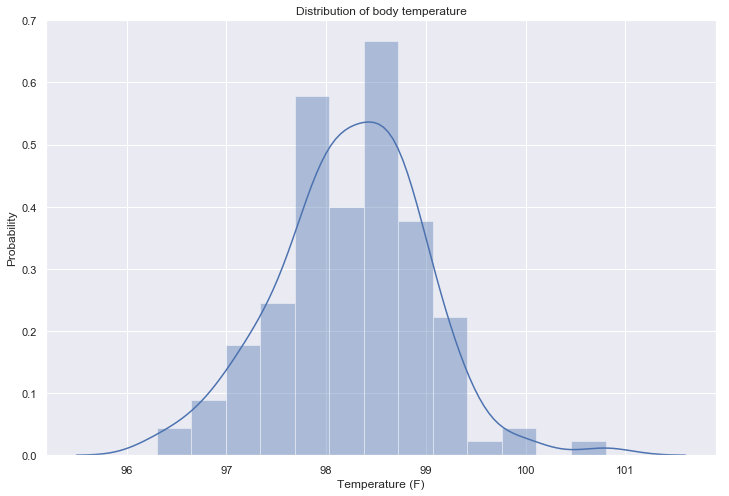

In [3]:
# create a PDF plot of body temperature
plt.figure(figsize=(12,8))
_ = sns.distplot(df.temperature)
_ = plt.title('Distribution of body temperature')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Probability')
plt.savefig('img/temp_distro.png')

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


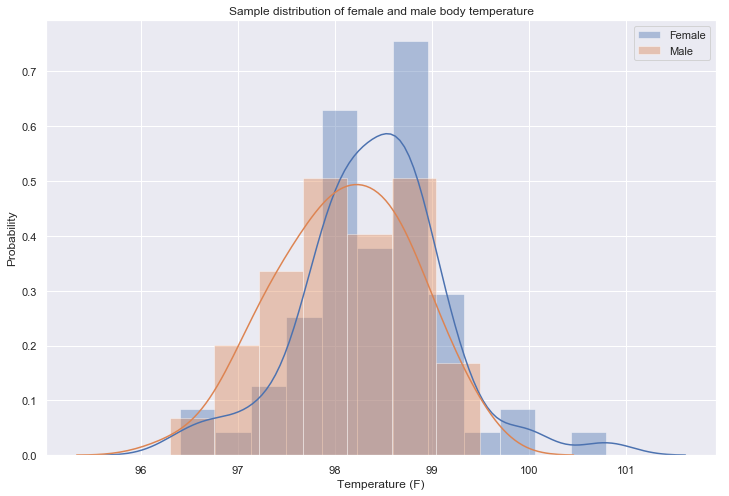

In [4]:
# create a PDF plot of temperature data by sex
plt.figure(figsize=(12,8))
ax = sns.distplot(female.temperature, label='Female')
sns.distplot(male.temperature, ax=ax, label='Male')
ax = plt.title('Sample distribution of female and male body temperature')
ax = plt.xlabel('Temperature (F)')
ax = plt.ylabel('Probability')
ax = plt.legend()
plt.savefig('img/m_f_distro.png')

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


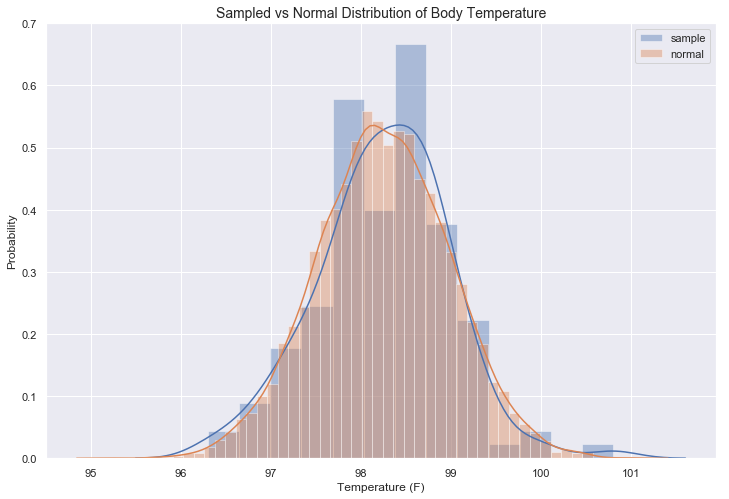

In [5]:
plt.figure(figsize=(12,8))
ax1 = sns.distplot(df.temperature, label='sample')
sns.distplot(np.random.normal(x, std, 10000), ax=ax1, label='normal')
ax1 = plt.title('Sampled vs Normal Distribution of Body Temperature', fontsize=14)
ax1 = plt.xlabel('Temperature (F)')
ax1 = plt.ylabel('Probability')
ax1 = plt.legend()
plt.savefig('img/sample_v_normal.png')

In [6]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

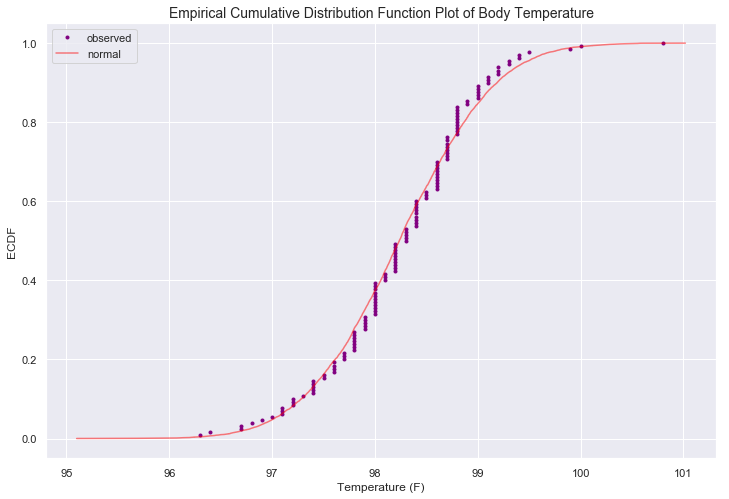

In [7]:
plt.figure(figsize=(12,8))

# plot temperature data as an empirical distribution function (ECDF)
temps, y = ecdf(df.temperature)
_ = plt.plot(temps, y, label='observed', color='purple', marker='.', linestyle='None')

# compare to a Normal ECDF
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size=10000)
x2, y2 = ecdf(samples)

_ = plt.plot(x2, y2, label='normal', color='red', alpha=0.5)
_ = plt.title('Empirical Cumulative Distribution Function Plot of Body Temperature', fontsize=14)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
_ = plt.legend()

plt.savefig('img/observed_ecdf.png')
plt.show()

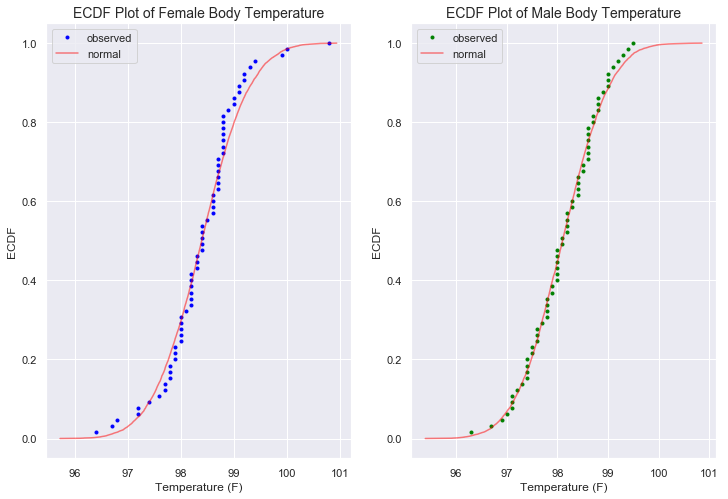

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

# plot female temperature data as an empirical distribution function (ECDF)
temps_f, y_f = ecdf(female.temperature)

ax2 = plt.subplot(1,2,1)
plt.plot(temps_f, y_f, label='observed', color='blue', marker='.', linestyle='None')

# compare to a Normal ECDF
mean_f = np.mean(female.temperature)
std_f = np.std(female.temperature)
samples_f = np.random.normal(mean_f, std_f, size=10000)
x2_f, y2_f = ecdf(samples_f)
plt.plot(x2_f, y2_f, label='normal', color='red', alpha=0.5)
plt.title('ECDF Plot of Female Body Temperature', fontsize=14)
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.legend()

# plot male temperature data as ECDF
temps_m, y_m = ecdf(male.temperature)

ax3 = plt.subplot(1,2,2, sharey=ax2)
plt.plot(temps_m, y_m, label='observed', color='green', marker='.', linestyle='None')

# compare to a Normal ECDF
mean_m = np.mean(male.temperature)
std_m = np.std(male.temperature)
samples_m = np.random.normal(mean_m, std_f, size=10000)
x2_m, y2_m = ecdf(samples_m)
plt.plot(x2_m, y2_m, label='normal', color='red', alpha=0.5)
plt.title('ECDF Plot of Male Body Temperature', fontsize=14)
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.legend()


plt.savefig('img/ecdf_male_v_female.png')
plt.show()

In [9]:
# create function to calculate quantitative normality fit
def normality_test(data, alpha):
    k2, p = stats.normaltest(data)
    print("p = {:.3f}".format(p))
    
    # null hypothesis: the data is normally distributed
    if p < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    
# test normality of all temperature data
print('All Temperature Data')
normality_test(data=df.temperature, alpha=0.05)
print('-'*30)
print('Female Temperature Data')
normality_test(data=female.temperature, alpha=0.05)
print('-'*30)
print('Male Temperature Data')
normality_test(data=male.temperature, alpha=0.05)

All Temperature Data
p = 0.259
The null hypothesis cannot be rejected
------------------------------
Female Temperature Data
p = 0.094
The null hypothesis cannot be rejected
------------------------------
Male Temperature Data
p = 0.640
The null hypothesis cannot be rejected


### Is the sample size large? Are the observations independent?

Sample size = 130

In [10]:
# calculate the necessary sample size for a 95% Confidence Level & 5% Margin of Error
sample_size = 1.96*2 *std*(1-std) / .05*2
sample_size

30.879454051836625

In [11]:
# calculate sample size needed for 95% confidence interval & 10% margin of error
m_e = 0.1
z = 1.96
p = 0.5
n_needed = ((np.sqrt(p * (1-p))*z)/m_e)**2
n_needed

96.03999999999998

### Is the true population mean really 98.6 degrees F?
First, we will calculate the sample mean from the data. Our null hypothesis will be based on the idea that this sample mean will be equal to the true population mean. To test this, we will first bootstrap 100,000 sample means from the data. We will then use this data to find the p-value of 98.6.

H<sub>0</sub>: The population mean is equal to 98.6<sup>o</sup>F

H<sub>A</sub>: The population mean is **not** equal to 98.6<sup>o</sup>F

In [12]:
# create bootstrap function
def bootstrap_replicates(data, func=np.mean):
    '''
    A function to take a random sample with replacement
    from the original data array and return a sample
    test statistic.
    
    data = array of original data
    func = test statistic, defaults to mean
    '''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# create empty array for bootstrapping
bs_replicates = np.empty(10000)

# bootstrap 100,000 replicate sample means
for i in range(10000):
    bs_replicates[i] = bootstrap_replicates(data=df.temperature)


C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


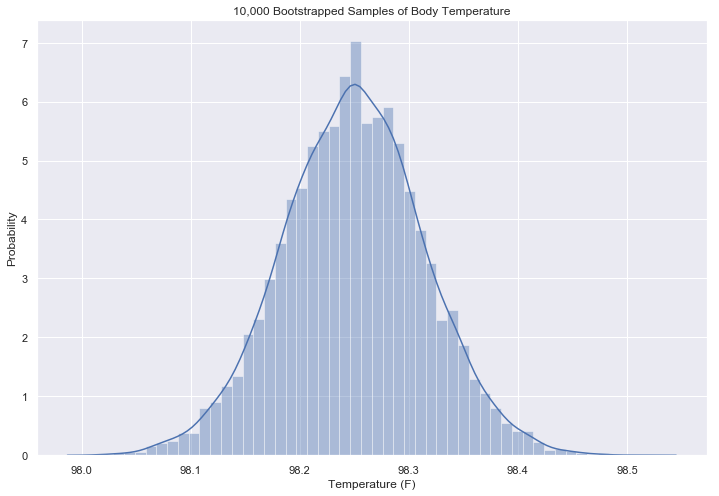

In [13]:
# draw a PDF of the sample means
plt.figure(figsize=(12,8))
_ = sns.distplot(bs_replicates)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Probability')
_ = plt.title('10,000 Bootstrapped Samples of Body Temperature')
plt.savefig('img/bootstrap_temp_distro.png')

In [14]:
# calculate 95% confidence interval
np.percentile(bs_replicates, [2.5,97.5])

array([98.12151923, 98.37769231])

In [15]:
# sampling distribution mean and standard deviation
mu_xbar = 98.6
theta = std / np.sqrt(n)

# model a normal distribution with the sampling distribution
sample_distro = np.random.normal(mu_xbar, theta, 10000)

# define a 95% confidence interval
np.percentile(sample_distro, [2.5, 97.5])

array([98.4743389 , 98.72479095])

In [16]:
theta

0.06405661469519337

In [17]:
# calucalate the difference of means, assuming a mean of 98.6 for the population
difference = x - 98.6

# calculate the z-score
z_score = difference / theta
print('z-score =', z_score)

z-score = -5.4759252020785585


In [18]:
# convert z-score to p-value
p = stats.norm.cdf(z_score)
p

2.1761575829356528e-08

In [19]:
def t_stat(data, pop_mu):
    '''
    Define a t-statistic from an array.
    data = array of data
    pop_mu = population mean of nul hypothesis
    
    n = sample size
    v = variance
    d = difference of means
    t = t-statistic
    p = p-value
    '''
    n = len(data)
    v = np.var(data, ddof=1)
    d = np.mean(data) - pop_mu
    t = d / np.sqrt(v / float(n))
    p = stats.norm.cdf(t)
    
    return t,p
    
t_stat, pval = t_stat(df.temperature, 98.6)
print('t-statistic =', t_stat)
print('p-value =', pval)

t-statistic = -5.4548232923645195
p-value = 2.4510785070506077e-08


C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


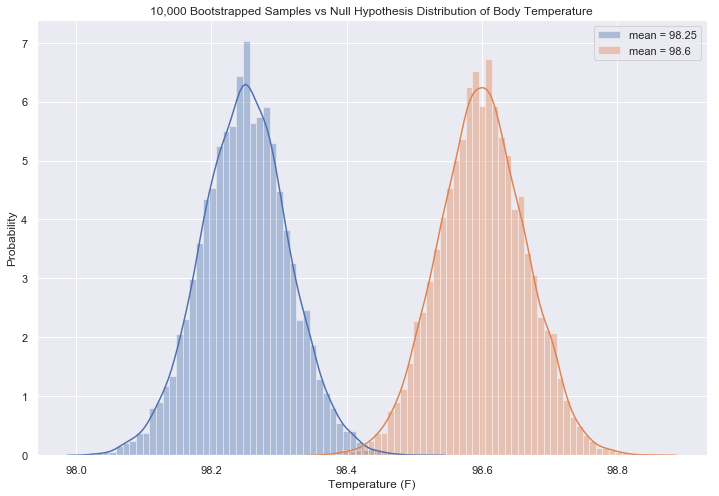

In [20]:
# plot the bootstrapped sample means vs the null hypothesis
plt.figure(figsize=(12,8))

# draw the distribution of the sample means
_ = sns.distplot(bs_replicates, label='mean = 98.25')

# draw the distribution of the null hypothesis
_ = sns.distplot(sample_distro, label='mean = 98.6')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Probability')
_ = plt.title('10,000 Bootstrapped Samples vs Null Hypothesis Distribution of Body Temperature')
_ = plt.legend()
plt.savefig('img/bs_v_null_distro.png')

**Draw a small sample of size 10 from the data and repeat both frequentist tests.**

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [21]:
# generate 10 small random samples and find the mean z-score
small_zscores = np.empty(10)
p_value = np.empty(10)

for i in range(10):
    # generate a small random sample, n=10
    small_sample = np.random.choice(df.temperature, size=10)
    small_diff = np.mean(small_sample) - 98.6
    small_theta = np.std(small_sample)/np.sqrt(10)

    small_zscores[i] = small_diff / small_theta
    p_value[i] = stats.norm.cdf(small_zscores[i])
    print('z-score: {0:.4f} | p-value: {1:.4f}'.format(small_zscores[i], p_value[i]))

print('Mean Small Sample z-score = {:.3f}'.format(np.mean(small_zscores)))
print('Range of p-values: ({0:.5f} to {1:.5f})'.format(min(p_value), max(p_value)))

z-score: -1.4327 | p-value: 0.0760
z-score: -2.9158 | p-value: 0.0018
z-score: -2.1758 | p-value: 0.0148
z-score: -3.0811 | p-value: 0.0010
z-score: -0.0876 | p-value: 0.4651
z-score: 2.2183 | p-value: 0.9867
z-score: -3.0224 | p-value: 0.0013
z-score: -7.7383 | p-value: 0.0000
z-score: -1.5681 | p-value: 0.0584
z-score: -0.2462 | p-value: 0.4028
Mean Small Sample z-score = -2.005
Range of p-values: (0.00000 to 0.98673)


In [22]:
# generate 10 small random samples and find the mean t-statistic
small_ts = np.empty(10)
p_value = np.empty(10)

for i in range(10):
    # generate a small random sample, n=10
    small_sample = np.random.choice(df.temperature, size=10)
    
    small_ts[i], p_value[i] = stats.ttest_1samp(small_sample, 98.6)
    print('t-statistic: {0:.4f} | p-value: {1:.4f}'.format(small_ts[i], p_value[i]))

print('Mean Small Sample t-statistic = {:.3f}'.format(np.mean(small_ts)))
print('Range of p-values: ({0:.5f} to {1:.5f})'.format(min(p_value), max(p_value)))

t-statistic: -4.1678 | p-value: 0.0024
t-statistic: -5.8936 | p-value: 0.0002
t-statistic: -3.1049 | p-value: 0.0126
t-statistic: -2.0310 | p-value: 0.0728
t-statistic: -3.0509 | p-value: 0.0138
t-statistic: -2.8673 | p-value: 0.0186
t-statistic: -4.3791 | p-value: 0.0018
t-statistic: -1.8681 | p-value: 0.0946
t-statistic: -1.0915 | p-value: 0.3034
t-statistic: -1.0178 | p-value: 0.3353
Mean Small Sample t-statistic = -2.947
Range of p-values: (0.00023 to 0.33535)


**At what temperature should we consider someone's temperature to be "abnormal"?**

In [23]:
# calculate 95% confidence interval for bootstrapped mean
ci_95 = np.percentile(bs_replicates, [2.5, 97.5])

# calculate 99% confidence interval
ci_99 = np.percentile(bs_replicates, [0.5, 99.5])

print('With a 95% Confidence Interval:')
print('Abnormal temperatures would fall below {0:.2f} and above {1:.2f}'.format(ci_95[0],ci_95[1]))
print('-'*100)
print('With a 99% Confidence Interval:')
print('Abnormal temperatures would fall below {0:.2f} and above {1:.2f}'.format(ci_99[0],ci_99[1]))

With a 95% Confidence Interval:
Abnormal temperatures would fall below 98.12 and above 98.38
----------------------------------------------------------------------------------------------------
With a 99% Confidence Interval:
Abnormal temperatures would fall below 98.08 and above 98.42


In [24]:
# calculate frequentist confidence intervals
fci_95 = np.percentile(df.temperature, [2.5, 97.5])
fci_99 = np.percentile(df.temperature, [0.5, 99.5])

print('With a 95% Confidence Interval:')
print('Abnormal temperatures would fall below {0:.2f} and above {1:.2f}'.format(fci_95[0],fci_95[1]))
print('-'*100)
print('With a 99% Confidence Interval:')
print('Abnormal temperatures would fall below {0:.2f} and above {1:.2f}'.format(fci_99[0],fci_99[1]))

With a 95% Confidence Interval:
Abnormal temperatures would fall below 96.72 and above 99.48
----------------------------------------------------------------------------------------------------
With a 99% Confidence Interval:
Abnormal temperatures would fall below 96.36 and above 100.28


**Is there a significant difference between males and females in normal temperature?**

In [25]:
female_bs = np.empty(10000)

for i in range(10000):
    female_bs[i] = bootstrap_replicates(female.temperature)
    
male_bs = np.empty(10000)

for i in range(10000):
    male_bs[i] = bootstrap_replicates(male.temperature)

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


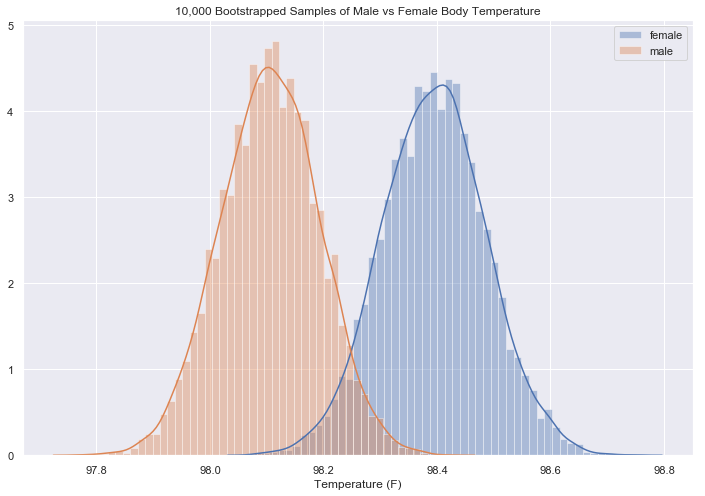

In [26]:
# plot the bootstrapped female vs male means
plt.figure(figsize=(12,8))

# draw the distribution of the sample means
ax5 = sns.distplot(female_bs, label='female')

# draw the distribution of the null hypothesis
sns.distplot(male_bs, label='male', ax=ax5)
ax5 = plt.xlabel('Temperature (F)')
ax5 = plt.title('10,000 Bootstrapped Samples of Male vs Female Body Temperature')
ax5 = plt.legend()
plt.savefig('img/bs_male_v_female_distro.png')

In [27]:
# calculate Pearson correlation coefficent
print('Pearson Correlation Coefficient: {:.4f}'.format(stats.pearsonr(female_bs, male_bs)[0]))

Pearson Correlation Coefficient: 0.0083


H<sub>0</sub>: There is no difference in means between female and male body temperatures.

H<sub>A</sub>: There is a difference in means between female and male body temperatures.

significance level = 0.05

In [28]:
# Calculate mean and standard deviation male bootstrap samples
male_bs_mu = np.mean(male_bs)
male_bs_s = np.std(male_bs)

# Calculate mean and standard deviation female bootstrap samples
female_bs_mu = np.mean(female_bs)
female_bs_s = np.std(female_bs)

# calculate difference in means
mean_diff_bs = female_bs_mu - male_bs_mu

# calculate the Standard Error of means
std_diff_bs = np.sqrt((female_bs_s**2 / len(female_bs)) + (male_bs_s**2 / len(male_bs)))

# Generate a normal distribution assuming the null hypothesis
diff_normal_bs = np.random.normal(0, std_diff_bs, 10000)
                          
#Calculate the 95% Confidence interval
print('95% confidence interval: {}'.format(np.percentile(diff_normal_bs, [2.5,97.5])))

#calculate the z-score
z_score = (mean_diff_bs - 0) / std_diff_bs
print('Difference of means: {:.4f}'.format(mean_diff_bs))
print('z-score: {:.2f}'.format(z_score))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z_score)))

# calculate t-statistic
t_stat, p = stats.ttest_ind(female_bs, male_bs)
print('t-statistic = {0:.2f}\np-value = {1:.4f}'.format(t_stat,p))

95% confidence interval: [-0.00243153  0.00242777]
Difference of means: 0.2895
z-score: 230.05
p-value: 0.0000
t-statistic = 230.04
p-value = 0.0000


In [29]:
# Calculate mean and standard deviation of male samples
male_mu = np.mean(male.temperature)
male_s = np.std(male.temperature)

# Calculate mean and standard deviation of female samples
female_mu = np.mean(female.temperature)
female_s = np.std(female.temperature)

# calculate difference in means
mean_diff = female_mu - male_mu

# calculate the Standard Error of means
std_diff = np.sqrt((female_s**2 / len(female.temperature)) + (male_s**2 / len(male.temperature)))

# Generate a normal distribution with the sample data
diff_normal_sample = np.random.normal(mean_diff, std_diff, 10000)

# Generate a normal distribution assuming the null hypothesis
diff_normal = np.random.normal(0, std_diff, 10000)
                          
#Calculate the 95% Confidence interval
print('Normal 95% confidence interval: {}'.format(np.percentile(diff_normal_sample, [2.5,97.5])))
print('Normal 95% confidence interval: {}'.format(np.percentile(diff_normal, [2.5,97.5])))
print('Difference of means: {:.4f}'.format(mean_diff))

#calculate the z-score
z_score = (mean_diff - 0) / std_diff
print('z-score: {:.2f}'.format(z_score))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z_score)))

# calculate t-statistics
t_stat, p = stats.ttest_ind(female.temperature, male.temperature)
print('t-statistic = {0:.2f}\np-value = {1:.4f}'.format(t_stat,p))

Normal 95% confidence interval: [0.04497106 0.53728405]
Normal 95% confidence interval: [-0.24495287  0.24598431]
Difference of means: 0.2892
z-score: 2.30
p-value: 0.0106
t-statistic = 2.29
p-value = 0.0239


C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


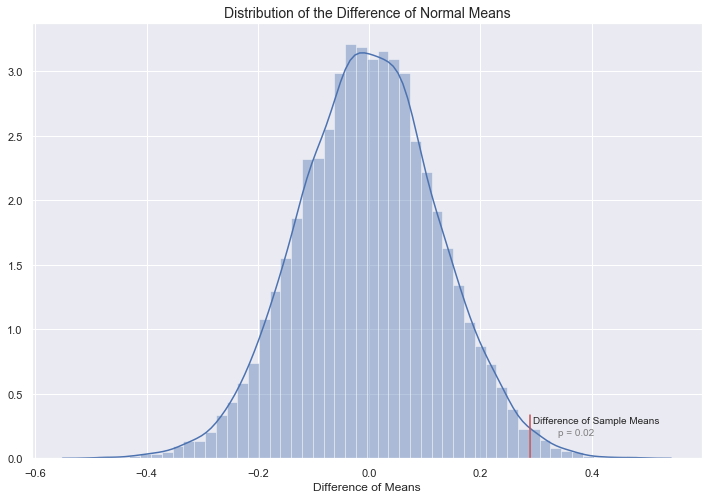

In [30]:
# plot the distribution of the difference of means assuming null hypothesis
plt.figure(figsize=(12,8))

_ = sns.distplot(diff_normal)
_ = plt.axvline(mean_diff, ymax=0.1, color='r')
_ = plt.annotate('Difference of Sample Means', xy=(mean_diff+0.005,0.27))
_ = plt.annotate('p = 0.02', xy=(mean_diff+0.05, 0.18), color='gray')

plt.xlabel('Difference of Means')
plt.title('Distribution of the Difference of Normal Means', fontsize=14)
plt.savefig('img/diff_of_mean_norm.png')